In [1]:
import sys
sys.path.append('../src/')
from utils import benchmark
from utils import iterate_bru_args
from utils import BenchmarkResult
from subprocess import TimeoutExpired

import matplotlib.pyplot as plt

In [2]:
max_x = 30

data = {}
xs = list(range(1, max_x))
for bru_args in iterate_bru_args():
    label = "-".join([e.value for e in bru_args.values()])
    ys = []
    try:
        for x in xs:
            y = BenchmarkResult(benchmark('^a+b*.*b*$', 'a' + 'b' * x + 'a', bru_args)['stderr']).steps
            ys.append(y)
    except TimeoutExpired:
        pass
    data[label] = ys

In [3]:
print(data)

{'thompson-none-spencer': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36], 'thompson-cn-spencer': [15, 17, 19, 20, 23, 25, 27, 28, 31, 33, 35, 36, 39, 40, 43, 44, 47, 48, 51, 52, 55, 57, 59, 60, 63, 64, 67, 68, 71], 'thompson-in-spencer': [18, 20, 22, 24, 26, 97, 30, 32, 34, 36, 38, 40, 42, 201, 46, 48, 50, 52, 266, 279, 58, 305, 62, 64, 66, 68, 70, 72, 396], 'thompson-none-lockstep': [11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47, 50, 53, 56, 59, 62, 65, 68, 71, 74, 77, 80, 83, 86, 89, 92, 95], 'glushkov-none-spencer': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36], 'glushkov-cn-spencer': [15, 17, 19, 20, 23, 25, 27, 28, 31, 33, 34, 36, 39, 41, 43, 44, 47, 48, 51, 52, 55, 57, 59, 60, 63, 65, 67, 68, 71], 'glushkov-in-spencer': [13, 15, 17, 19, 21, 22, 25, 27, 29, 31, 33, 34, 37, 39, 41, 43, 45, 47, 49, 51, 53, 54, 56, 59, 60, 63, 65, 66, 69], 'glu

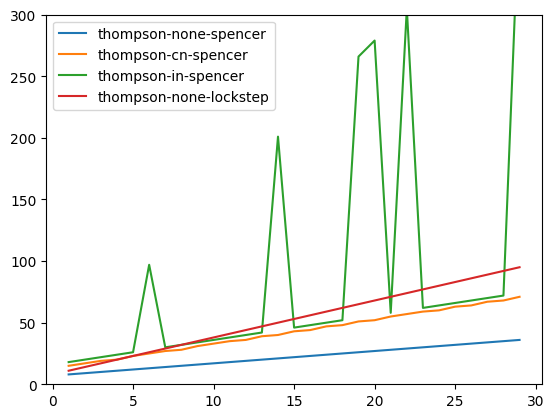

In [5]:
for label, ys in list(data.items())[:4]:
    plt.plot(xs[:len(ys)], ys)
plt.ylim(0, 300)
plt.legend(list(data.keys())[:4])
plt.show()

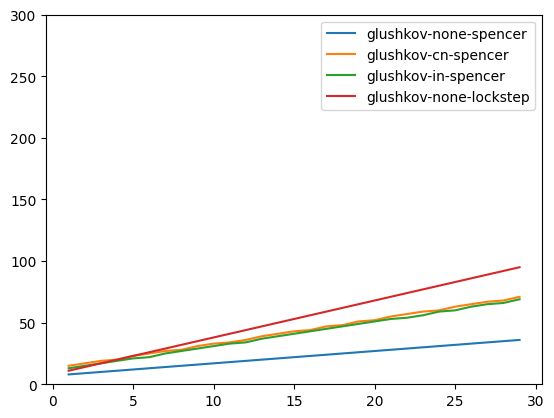

In [6]:
for label, ys in list(data.items())[4:]:
    plt.plot(xs[:len(ys)], ys)
plt.ylim(0, 300)
plt.legend(list(data.keys())[4:])
plt.show()